In [ ]:
#COMPREENSÃO DOS DADOS BRUTOS ----------------------------------------------------------------------------------------------------------------------

import pandas as pd
import os
import random
import math
import numpy as np 
from matplotlib import pyplot as plt
import xlwings as xw
import seaborn as sns
from collections import Counter
from scipy.stats import randint

#EXCEL - CAMINHO DO FICHEIRO
file_path = r"D:\Documentos\...\DataSet_DadosBrutos.xlsx"
dados_problema= pd.read_excel(file_path)
#print (dados_problema)
#print(dados_problema['MH'].value_counts())

SA     1185
TS      884
PSO     716
GA      270
ACO      61
Name: MH, dtype: int64


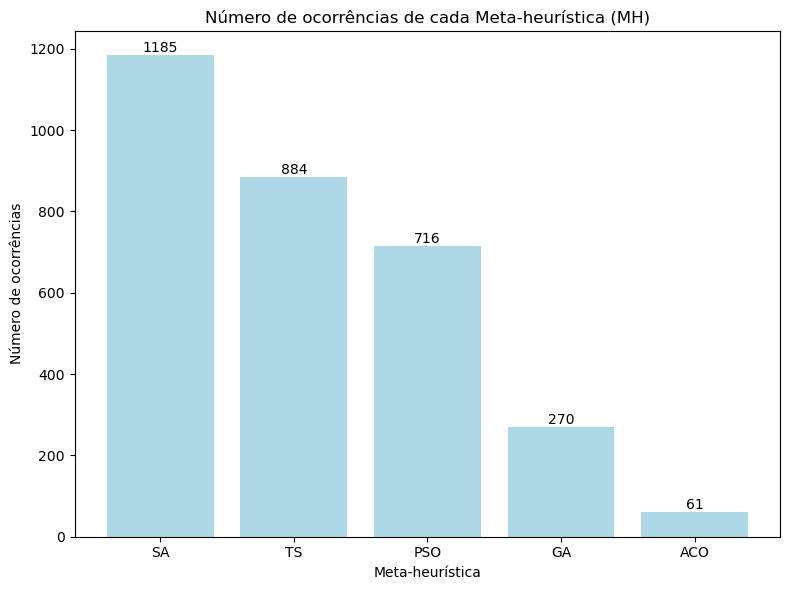

In [2]:
#GRÁFICO DE BARRAS - CONTAGEM DE MH --------------------------------------------------------------------------------------------

print(dados_problema['MH'].value_counts())

#FREQUÊNCIA DE CADA VALOR NA COLUNA MH
counts = dados_problema['MH'].value_counts().sort_values(ascending=False)

#CRIAR GRÁFICO DE BARRAS
plt.figure(figsize=(8, 6))
bars = plt.bar(counts.index, counts.values, color='lightblue')

#ADICIONAR OS VALORES EM CIMA DAS BARRAS
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.1, int(yval), ha='center', va='bottom')

plt.title('Número de ocorrências de cada Meta-heurística (MH)')
plt.xlabel('Meta-heurística')
plt.ylabel('Número de ocorrências')
plt.tight_layout()
plt.show()

In [3]:
#META-HEUSÍSTICAS NAS INSTÂNCIAS - NO TOTAL TEMOS 8 INSTANCIAS ----------------------------------------------------------------------------------

#REMOVER DUPLICADAS 
mh_por_cmaxopt_unicos = dados_problema[['CMAXOPT', 'MH']].drop_duplicates()

#CONTAR NÚMERO DE INSTÂNCIAS POR MH
contagem_mh = mh_por_cmaxopt_unicos['MH'].value_counts().reset_index()
contagem_mh.columns = ['MH', 'Num_CMAXOPT_distintos']

#ADICIONAR PERCENTAGEM
total_instancias = 80
contagem_mh['Percentagem'] = (contagem_mh['Num_CMAXOPT_distintos'] / total_instancias) * 100

#ARREDONDAR A PERCENTAGEM
contagem_mh['Percentagem'] = contagem_mh['Percentagem'].round(2)

print(contagem_mh)

    MH  Num_CMAXOPT_distintos  Percentagem
0   SA                     80       100.00
1  PSO                     79        98.75
2   TS                     79        98.75
3   GA                     64        80.00
4  ACO                     28        35.00


In [4]:
#CALCULO DO GAP PERCENTUAL MÉDIO, MÍNIMO E MÁXIMO DAS MH  -------------------------------------------------------------------------------------

#CALCULAR O GAP PERCENTUAL
dados_problema['Gap Percentual'] = ((dados_problema['CMAX'] - dados_problema['CMAXOPT']) / dados_problema['CMAXOPT']) * 100

#AGRYPAR POR MH E CALCULAR AS ESTATÍSTICAS
resultado = dados_problema.groupby('MH').agg(
    Media_Gap_Percentual=('Gap Percentual', 'mean'),
    Ocorrencias=('MH', 'count'),
    Min_Gap_Percentual=('Gap Percentual', 'min'),
    Max_Gap_Percentual=('Gap Percentual', 'max')
).reset_index()

#GAP PERCENTUAM MÉDIO
gap_percentual_medio_sistema = dados_problema['Gap Percentual'].mean()

#GAP PERCENTUAL MÉDIA SEM ACO
gap_sem_aco = dados_problema[dados_problema['MH'] != 'ACO']['Gap Percentual'].mean()

#RESULTADOS
print("Estatísticas por MH:")
print(resultado)
print("\nGap Percentual médio do sistema: {:.2f}%".format(gap_percentual_medio_sistema))
print("Gap Percentual médio sem ACO: {:.2f}%".format(gap_sem_aco))

Estatísticas por MH:
    MH  Media_Gap_Percentual  Ocorrencias  Min_Gap_Percentual  \
0  ACO             52.973699           61             6.23946   
1   GA             45.805393          270             0.00000   
2  PSO             49.471408          716             0.00000   
3   SA             48.634777         1185             0.00000   
4   TS             44.756106          884             0.00000   

   Max_Gap_Percentual  
0          149.641760  
1          139.034370  
2          252.558783  
3          222.060858  
4          126.890244  

Gap Percentual médio do sistema: 47.57%
Gap Percentual médio sem ACO: 47.46%


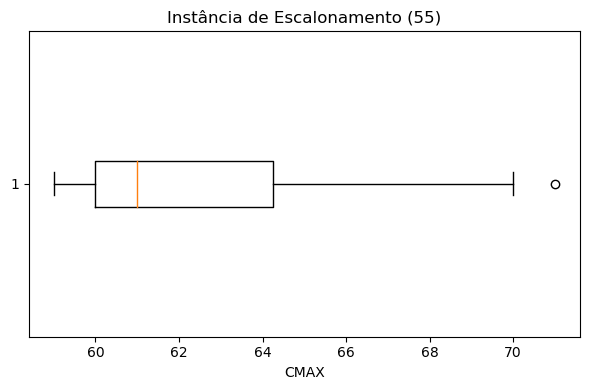

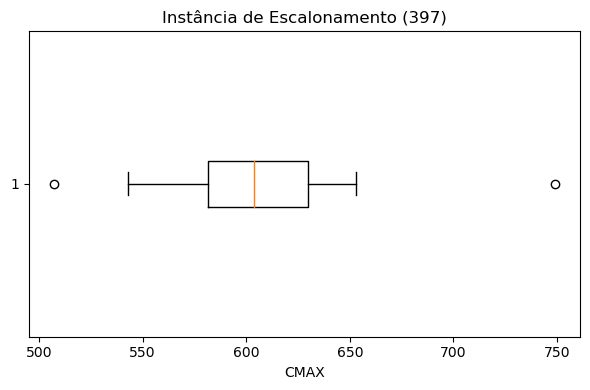

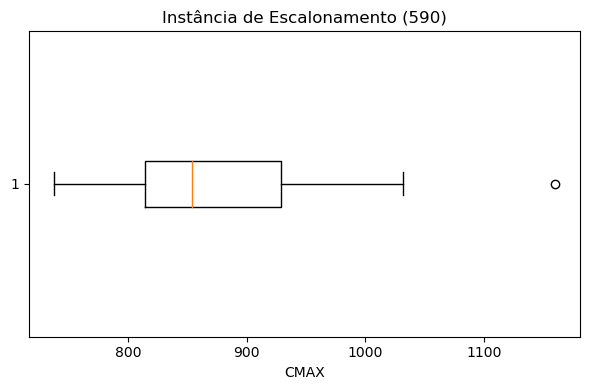

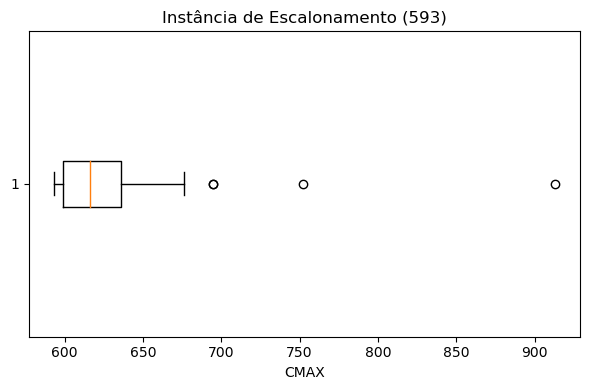

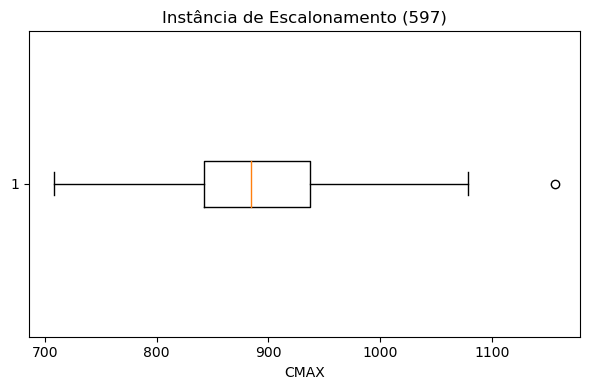

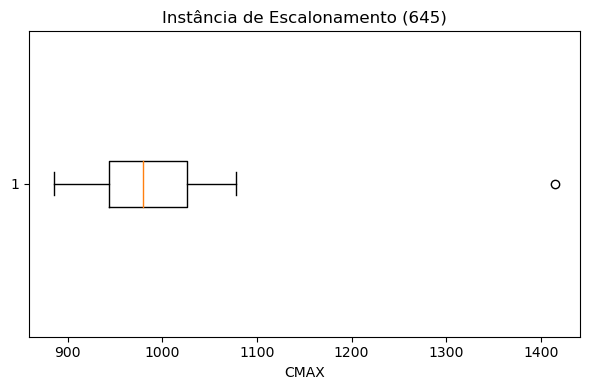

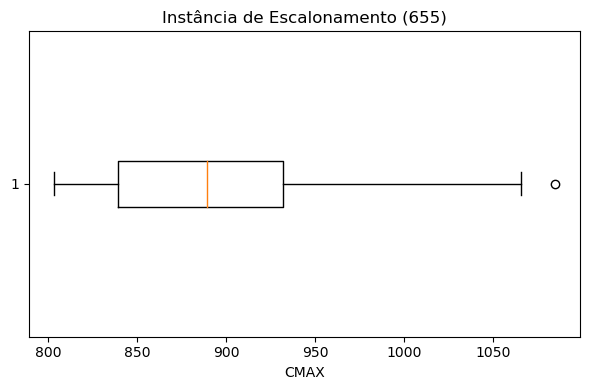

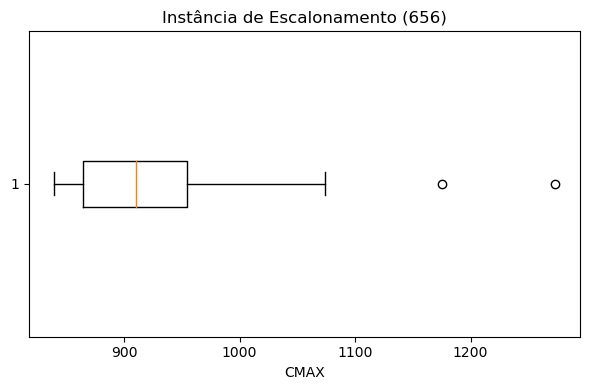

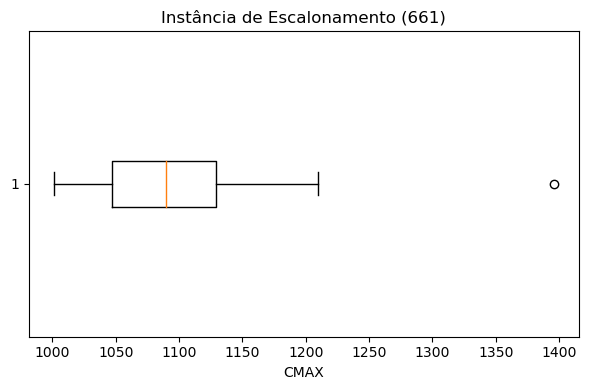

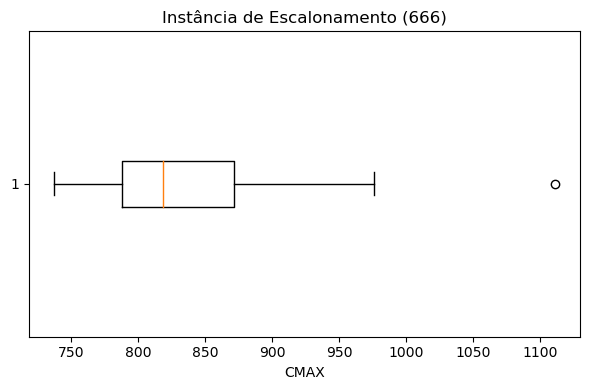

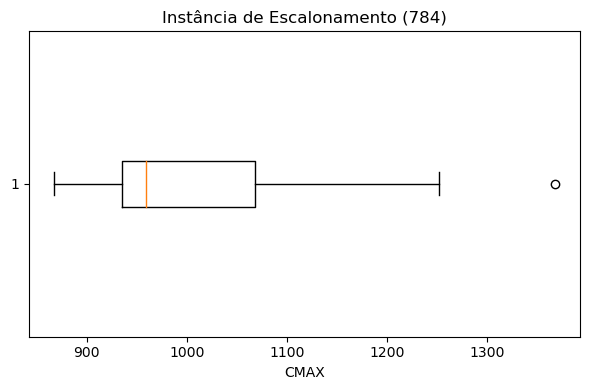

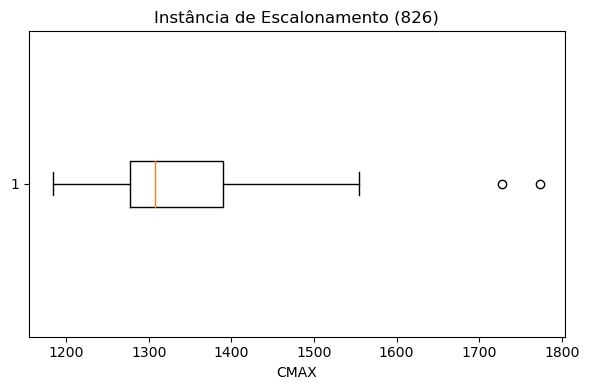

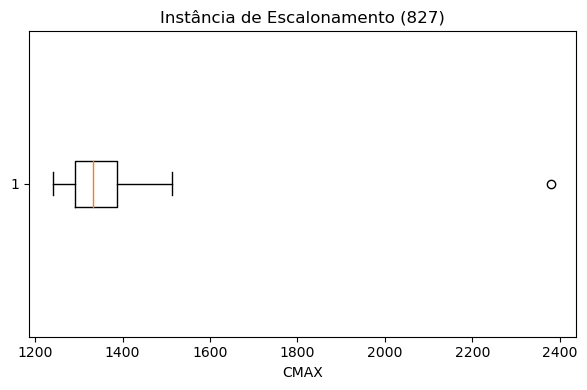

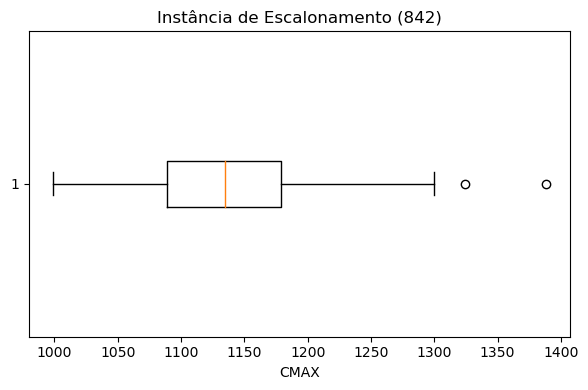

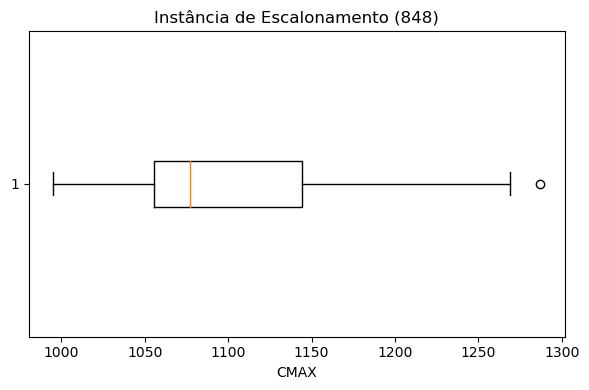

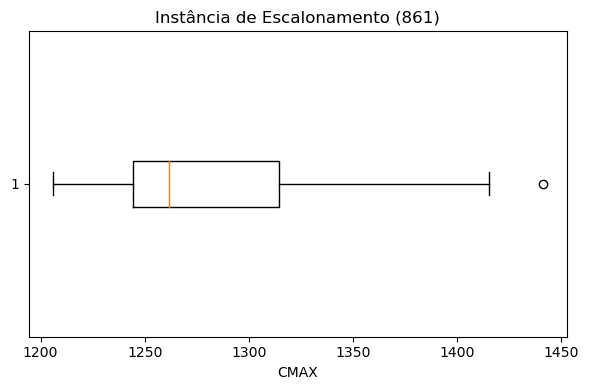

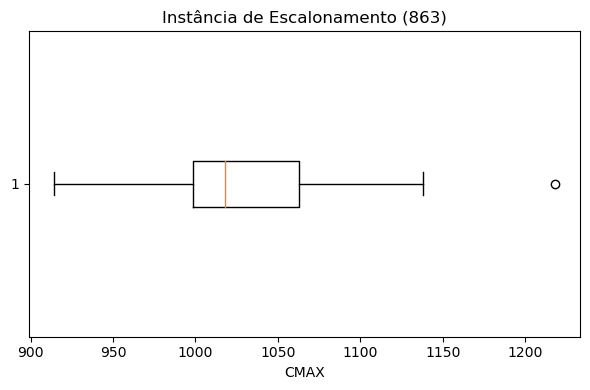

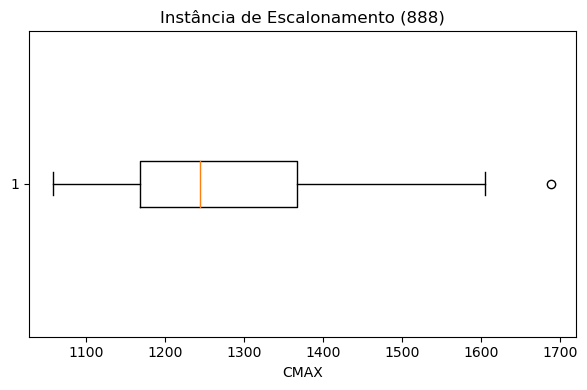

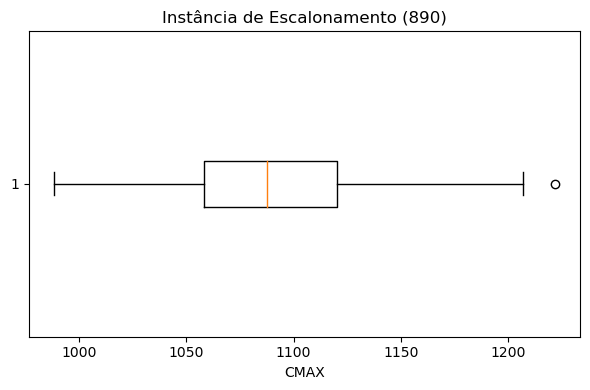

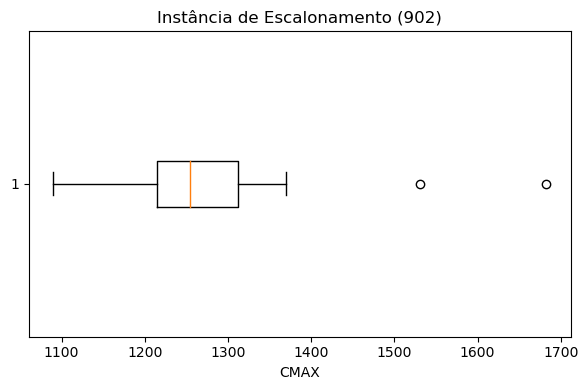

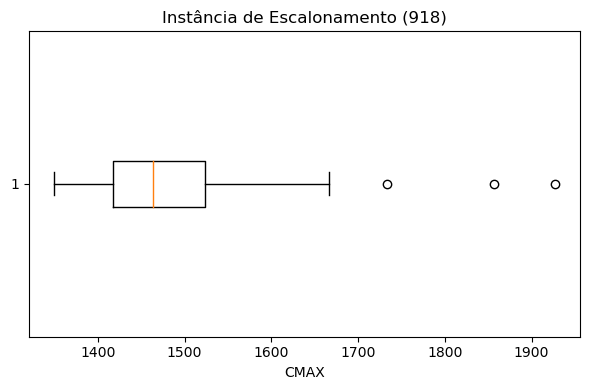

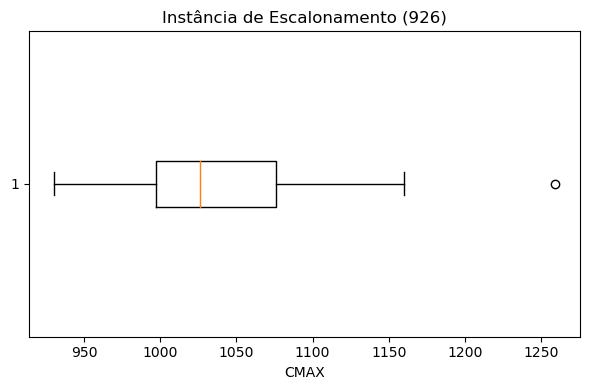

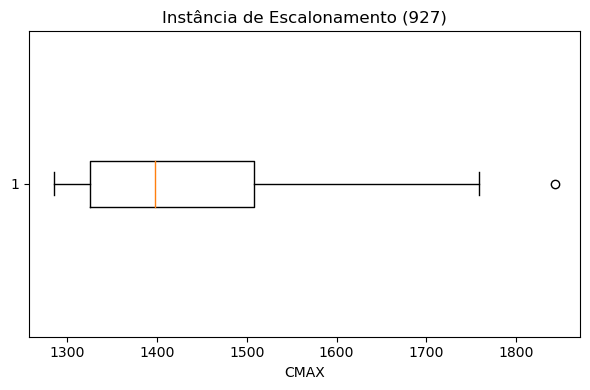

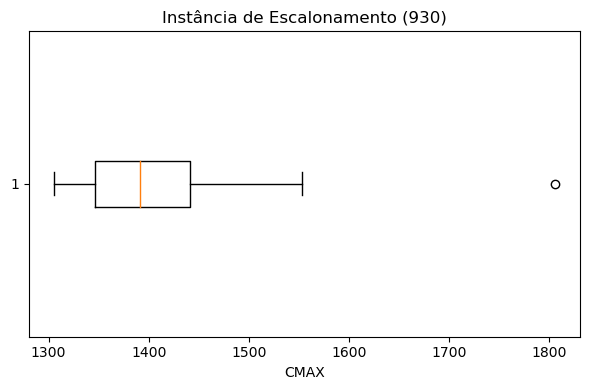

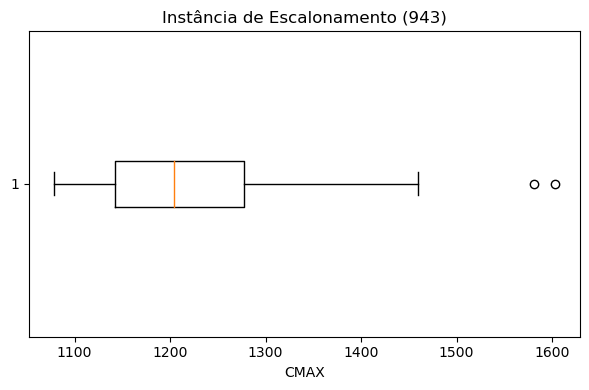

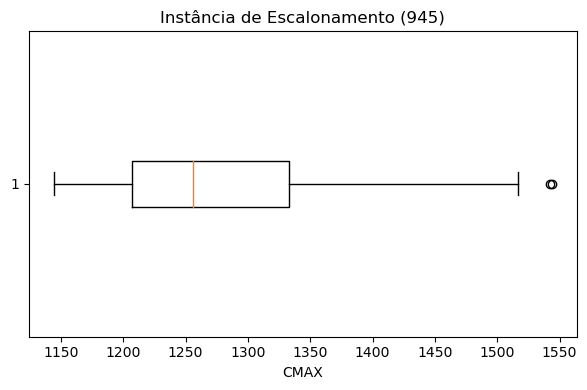

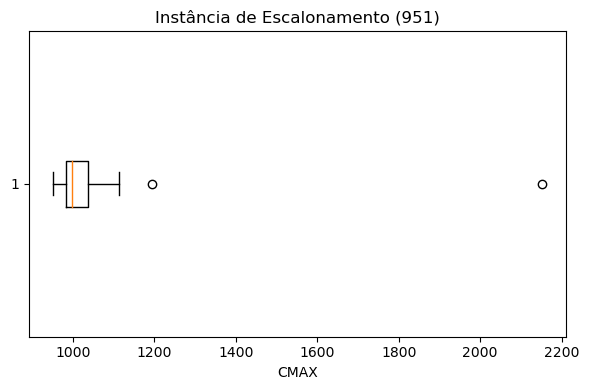

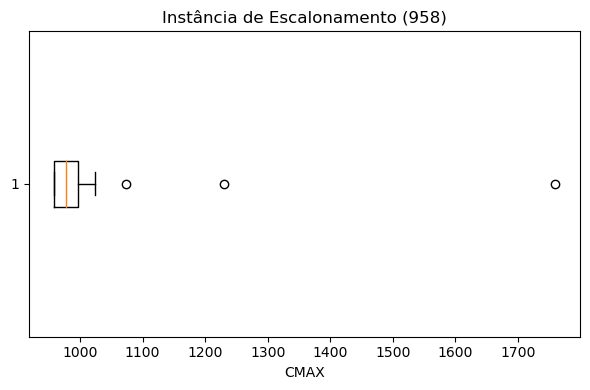

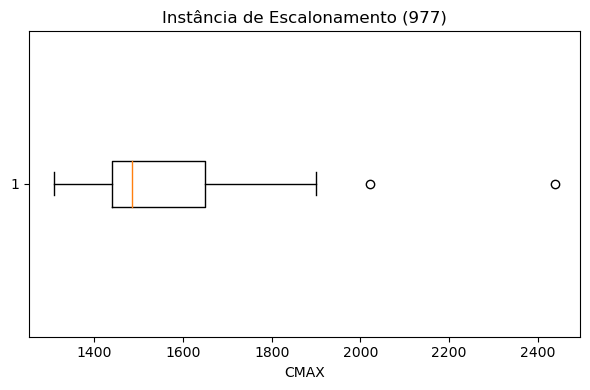

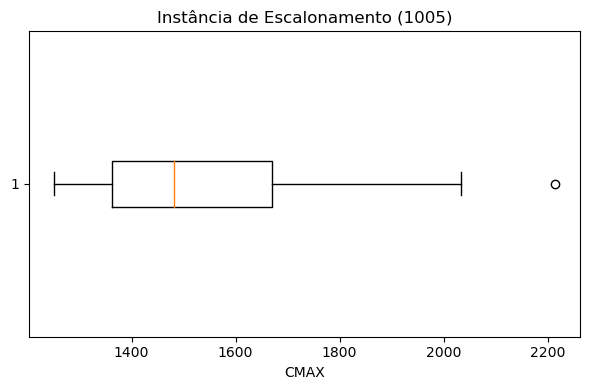

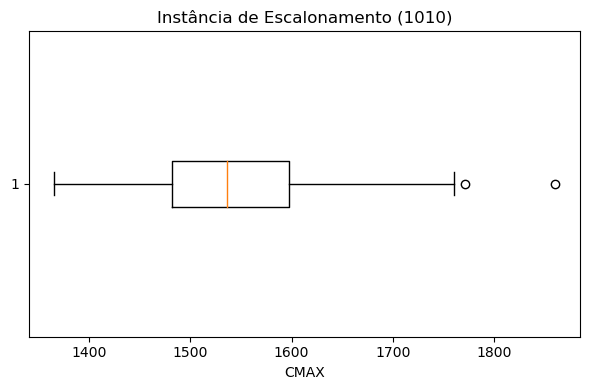

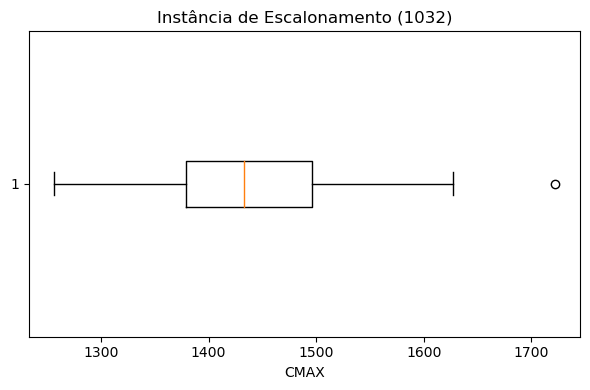

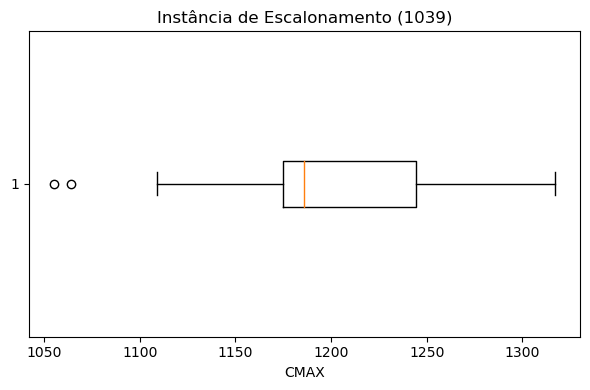

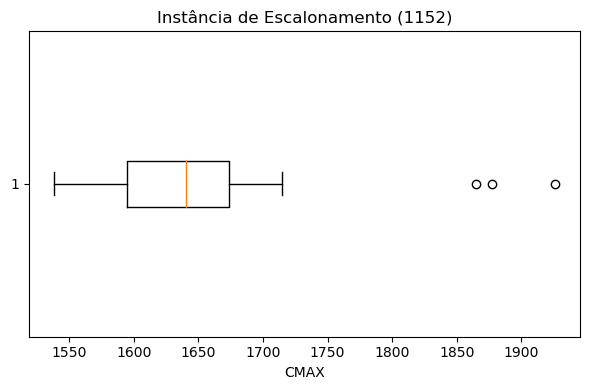

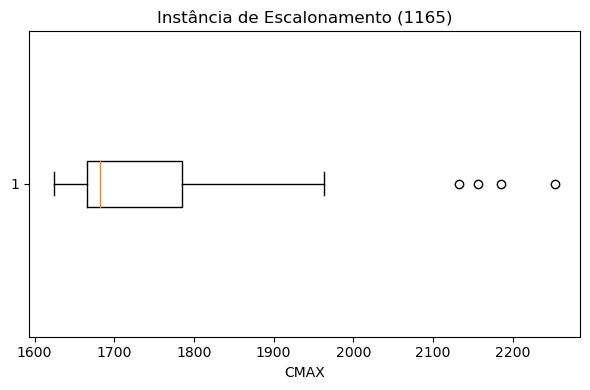

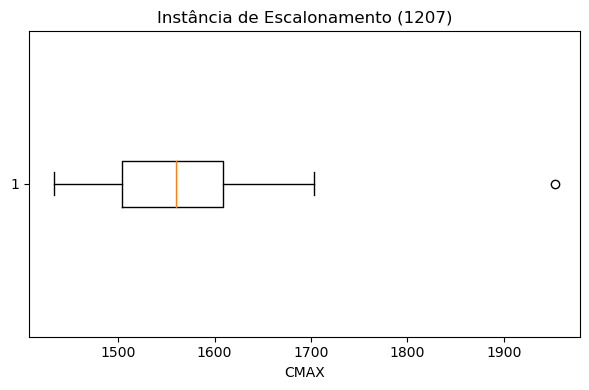

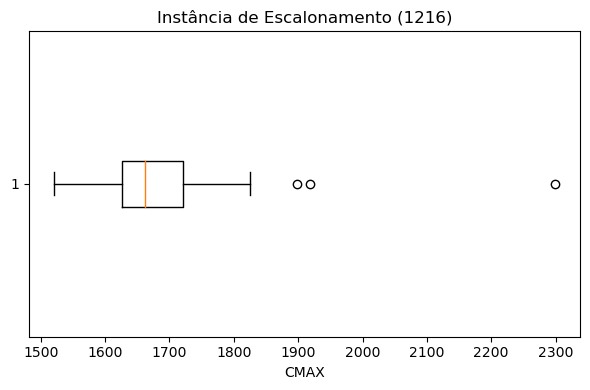

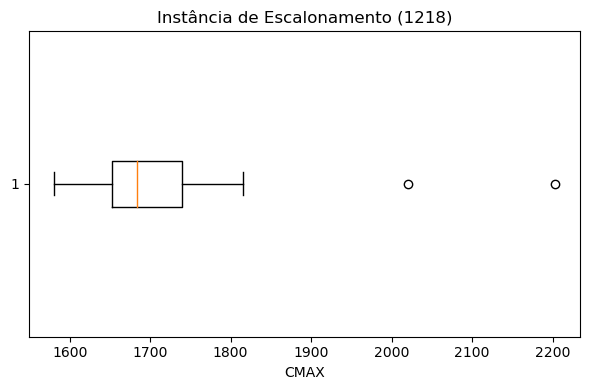

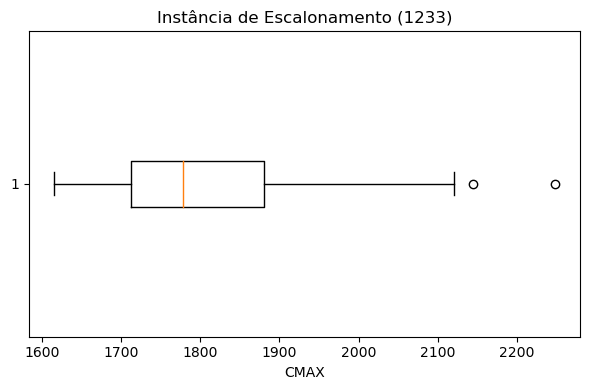

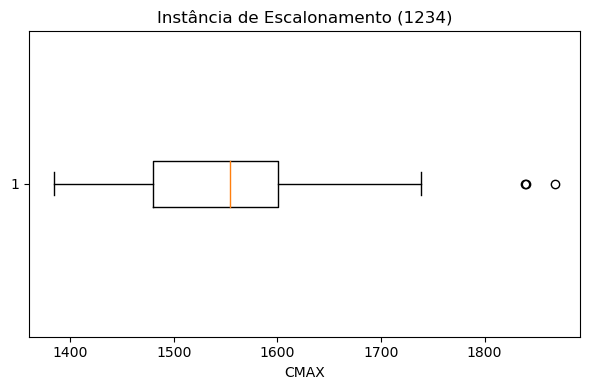

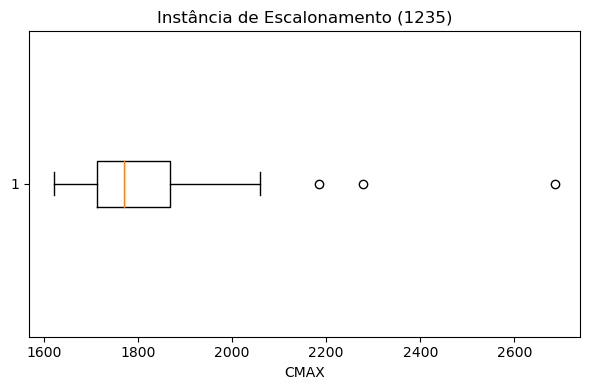

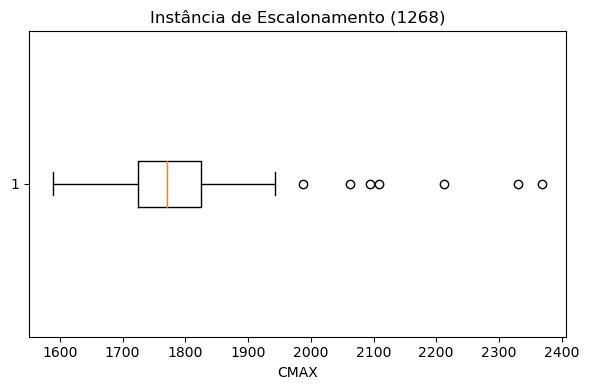

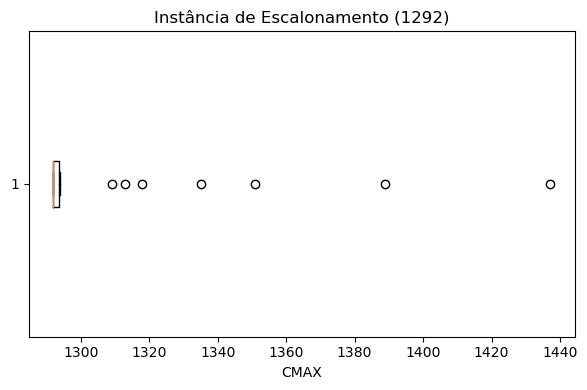

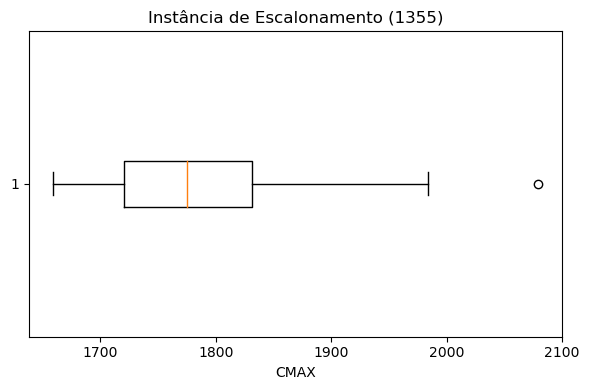

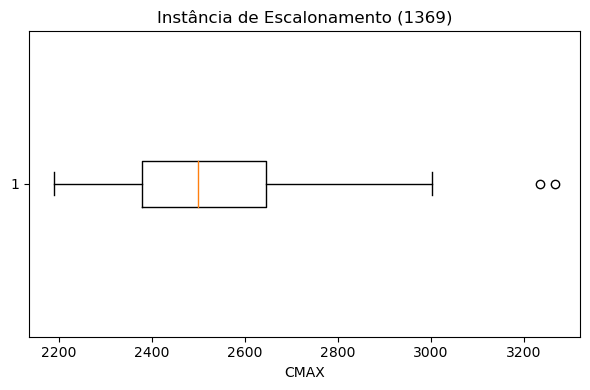

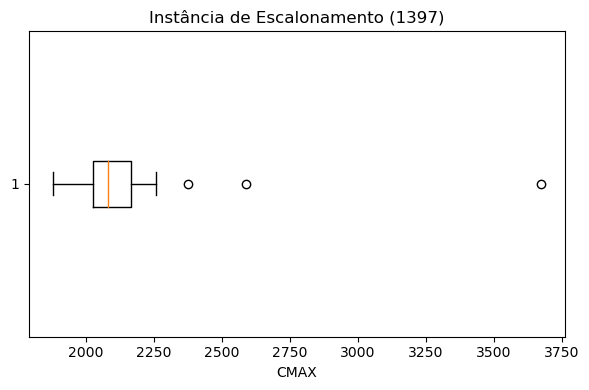

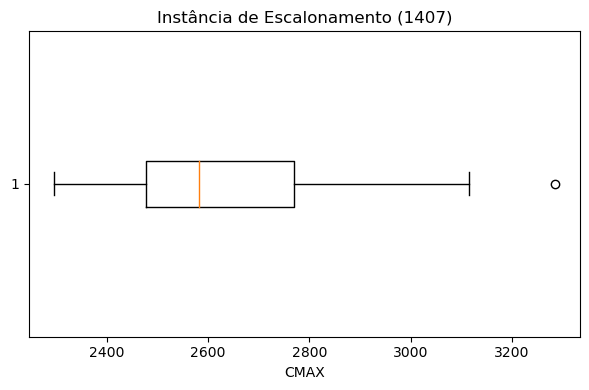

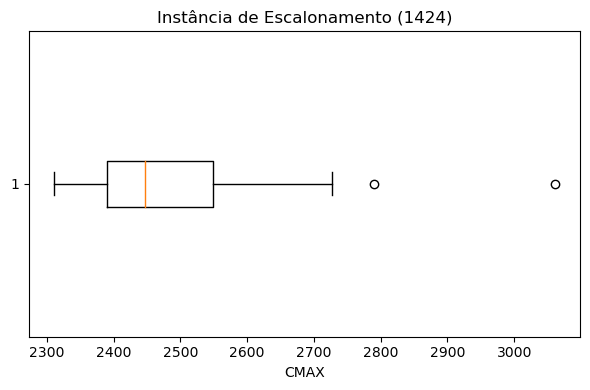

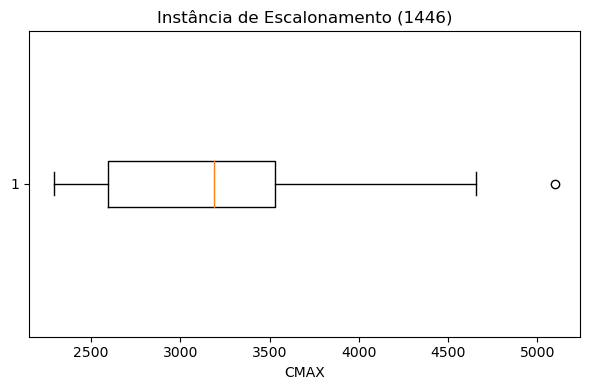

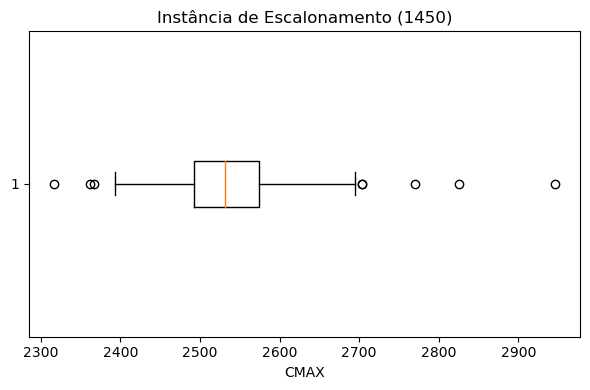

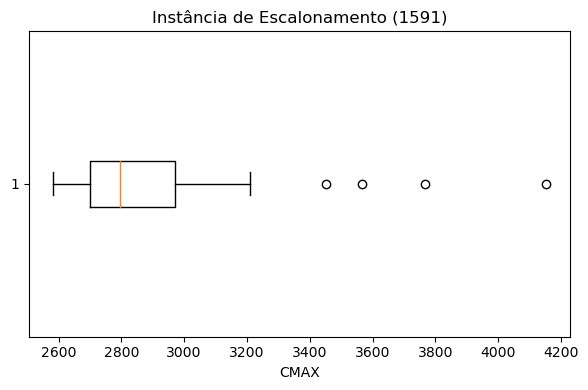

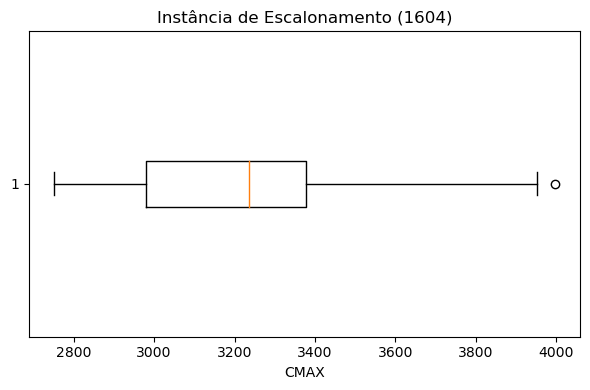

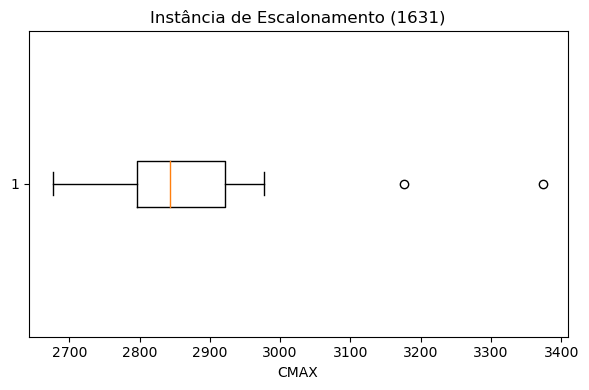

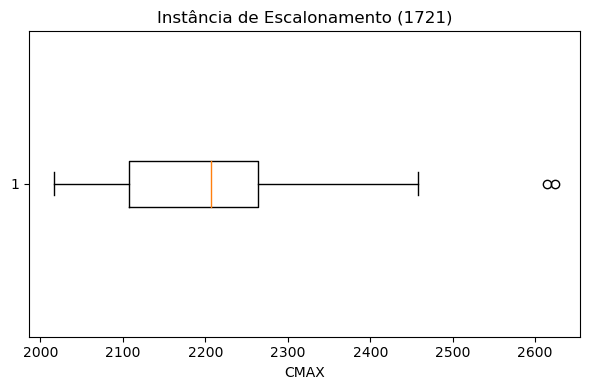

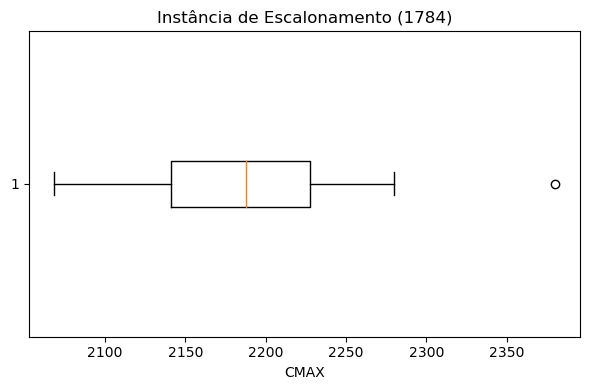

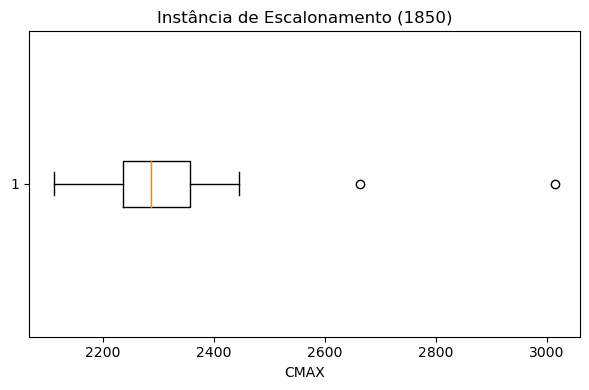

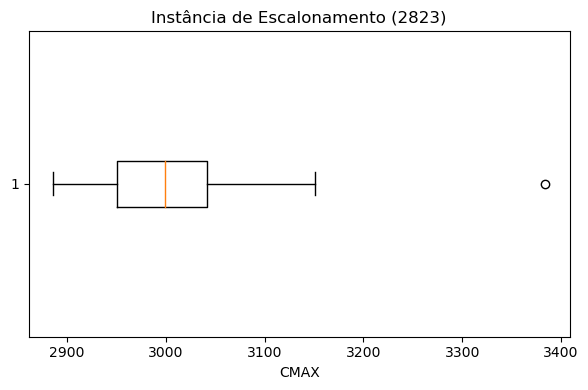

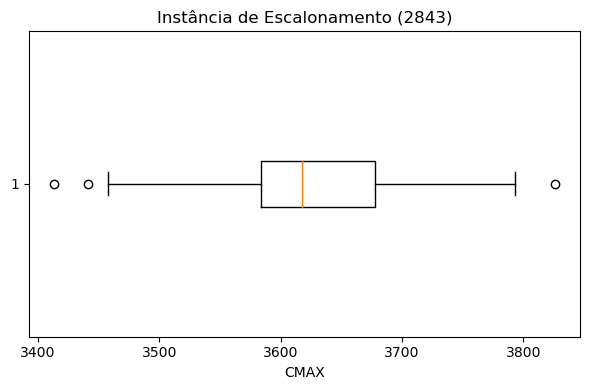

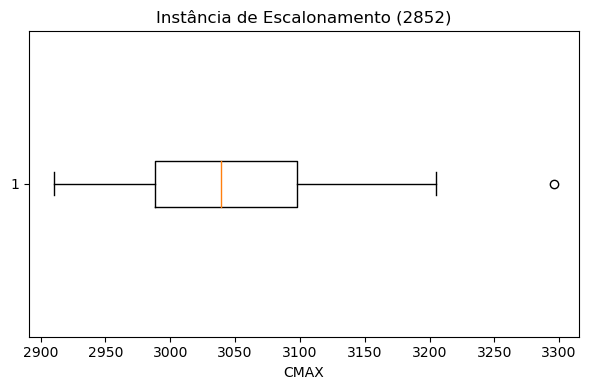

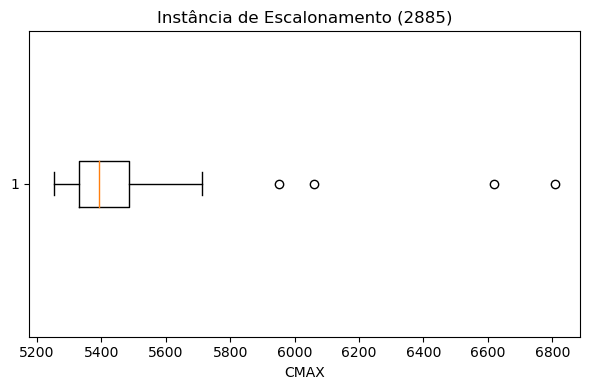

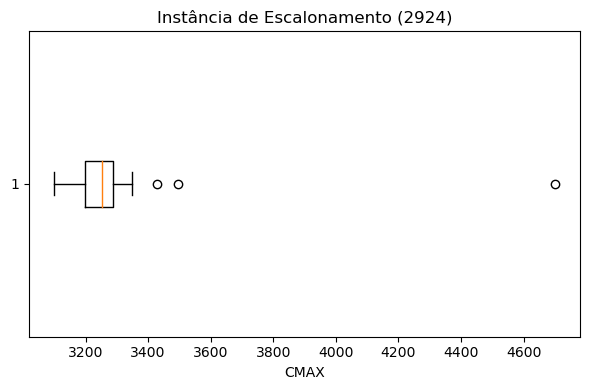

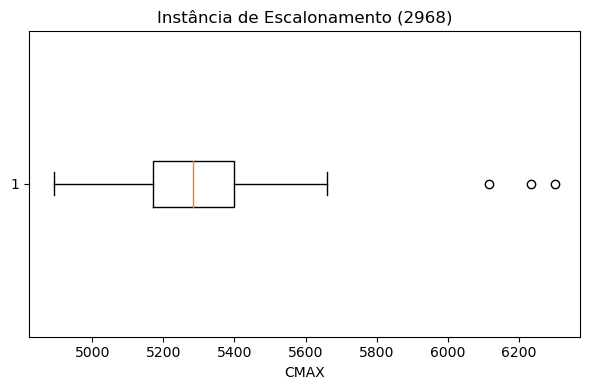

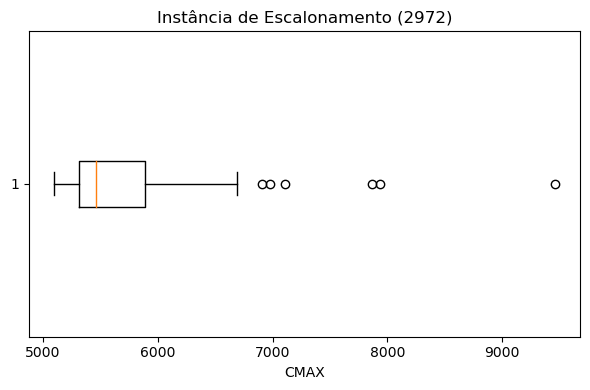

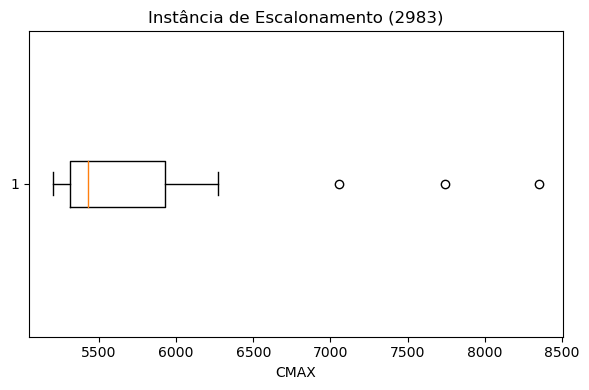

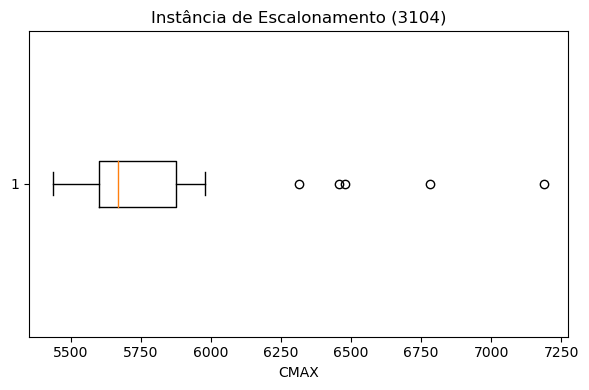

Número de CMAXOPT com outliers (gráficos apresentados): 65
Número de CMAXOPT SEM outliers (gráficos apresentados): 15


In [5]:
#BOXPLOTS- GRÁFICOS DAS INSTÂCIAS QUE TÊM OUTLIERS  ---------------------------------------------------------------------------------------------------

#ENCONTRAR O CMAXOPT ÚNICOS
cmaxopt_unicos = dados_problema['CMAXOPT'].unique()

num_graficos_outliers = 0
num_graficos_outliers_SEM = 0

for cmaxopt in cmaxopt_unicos:
    subset = dados_problema[dados_problema['CMAXOPT'] == cmaxopt]['CMAX']
    
    #CALCULAR O IQR
    q1 = subset.quantile(0.25)
    q3 = subset.quantile(0.75)
    iqr = q3 - q1
    
    #DEFINIR OS LIMITES DE OUTLIERS
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    
    #VERIFICAR OS OUTLIERS
    outliers = subset[(subset < limite_inferior) | (subset > limite_superior)]
    
    if not outliers.empty:
        num_graficos_outliers += 1

        #SE HOUVER OUTLIERS, APRESENTAR BOXPLOT
        plt.figure(figsize=(6, 4))
        plt.boxplot(subset, vert=False)
        plt.title(f'Instância de Escalonamento ({cmaxopt})')
        plt.xlabel('CMAX')
        plt.tight_layout()
        plt.show()
    else:
        num_graficos_outliers_SEM += 1

#EXIBIR O NÚMERO TOTAL DE GRÁFICO COM OUTLIERS E SEM OUTLIERS
print(f"Número de CMAXOPT com outliers (gráficos apresentados): {num_graficos_outliers}")
print(f"Número de CMAXOPT SEM outliers (gráficos apresentados): {num_graficos_outliers_SEM}")